In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
df=pd.read_csv("Census_Income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [70]:
df.shape

(32560, 15)

Here, we have 32560 rows and 15 coulmns

In [71]:
df=df.replace(" ?",np.nan)
#we have to handle some Miscoded values-->'?' in our dataset

In [72]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [74]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

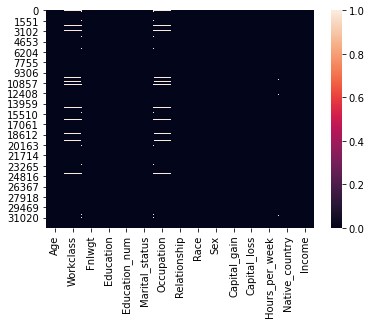

In [75]:
sns.heatmap(df.isnull())

In [76]:
df["Workclass"]=df["Workclass"].fillna("Private")
df["Occupation"]=df["Occupation"].fillna("Prof-specialty")
df["Native_country"]=df["Native_country"].fillna("United-States")

<AxesSubplot:>

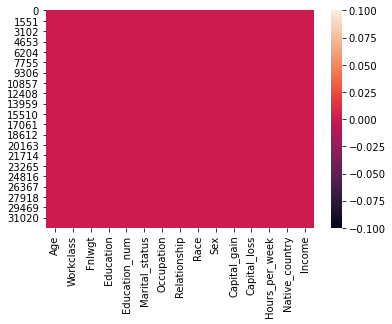

In [77]:
sns.heatmap(df.isnull())

In [78]:
df[["Education","Income"]][:15]

,Education,Income
0,Bachelors,<=50K
1,HS-grad,<=50K
2,11th,<=50K
3,Bachelors,<=50K
4,Masters,<=50K
5,9th,<=50K
6,HS-grad,>50K
7,Masters,>50K
8,Bachelors,>50K
9,Some-college,>50K


In [79]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

# Uni-Variate Analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

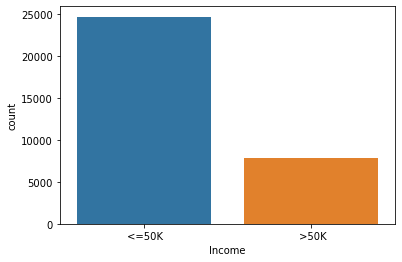

In [80]:
sns.countplot(df["Income"])

<AxesSubplot:ylabel='Frequency'>

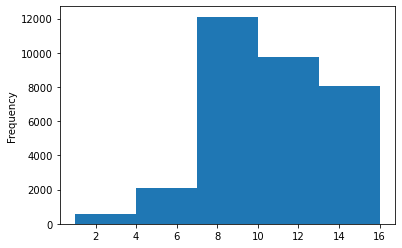

In [81]:
df["Education_num"].plot.hist(bins=5)

Eductaion number is higher in between 7 to 11

# Bi-Variate Analysis

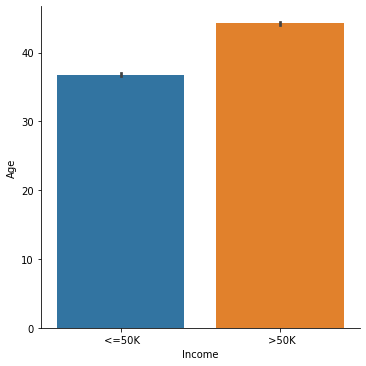

In [82]:
sns.catplot(x="Income",y="Age",kind="bar",data=df)
plt.show()

we can clearly visualize from the above graph that, >50k income is in all the age but <=50k is upto 38 age

<AxesSubplot:xlabel='Income', ylabel='Education'>

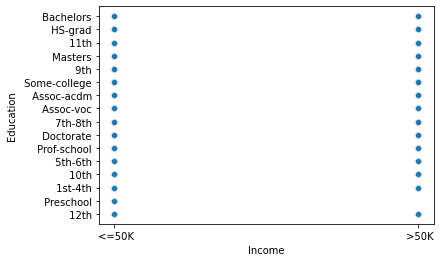

In [83]:
sns.scatterplot(x="Income",y="Education",data=df)

above visualization shows that none of the income depend upon Education

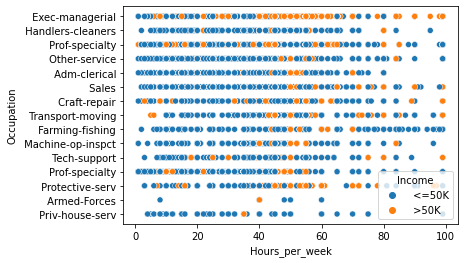

In [84]:
sns.scatterplot(x="Hours_per_week",y="Occupation",data=df,hue="Income")
plt.show()

So people whose income is <=50k is more than >50k in evry Occupation

As shown from above graph that those who are working Private has more income than all other workclass

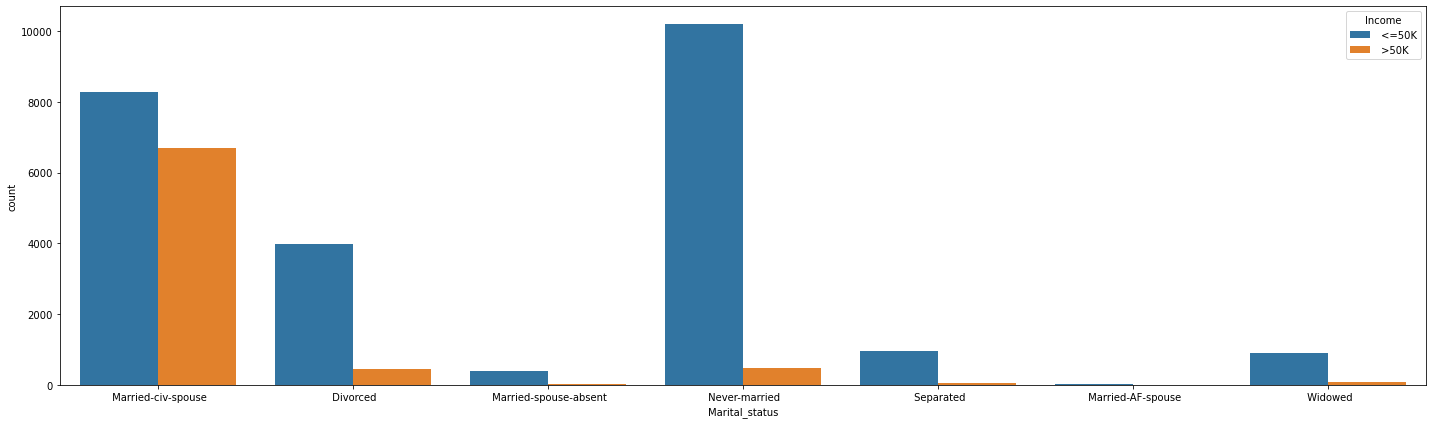

In [85]:
fig = plt.figure(figsize=(20,6))

sns.countplot('Marital_status', hue='Income', data=df)
plt.tight_layout()
plt.show()

As shown from above graph that those who are Never amrried has more income than all other Martial Status except Married-Civ-Spouse

<AxesSubplot:xlabel='Race', ylabel='Income'>

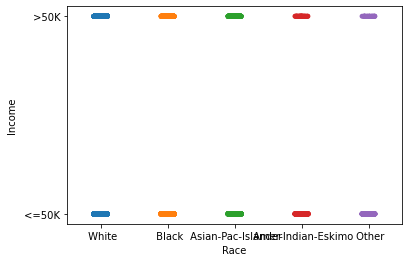

In [86]:
sns.stripplot(y="Income",x="Race",data=df)

In [87]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [88]:
df.mode()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

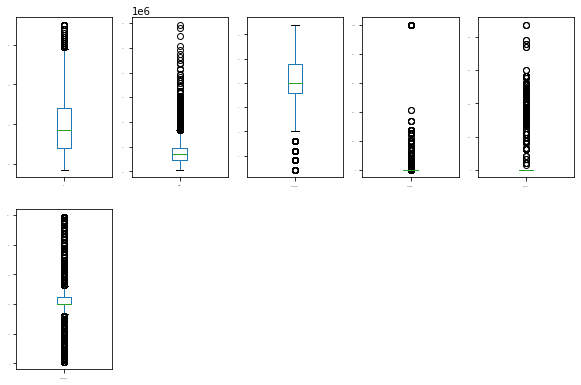

In [89]:
df.plot(kind="box",subplots=True,layout=(3,5),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

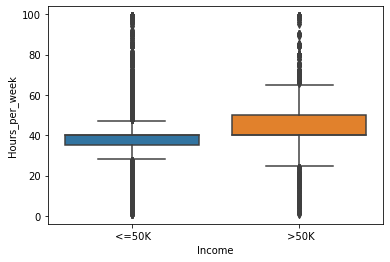

In [90]:
sns.boxplot(y='Hours_per_week',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Age'>

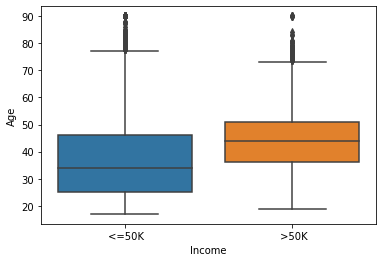

In [91]:
sns.boxplot(y='Age',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

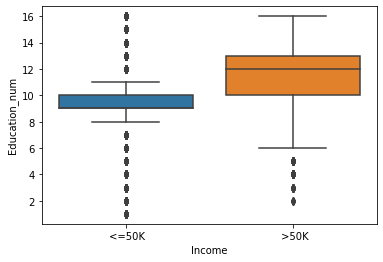

In [92]:
sns.boxplot(y='Education_num',x='Income',data=df)

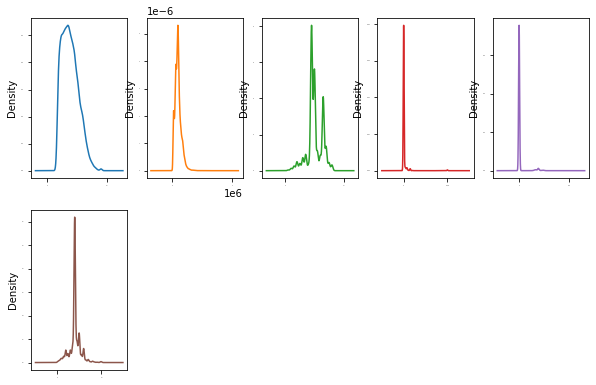

In [93]:
df.plot(kind="density",subplots=True,layout=(3,5),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

# Data Cleansing

In [94]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing outliers using IQR Method
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [95]:
df.shape

(32560, 15)

In [96]:
df_new.shape

(18997, 15)

In [97]:
loss_percentage=(32560-18997)/32560*100
print(loss_percentage)

41.6554054054054


# Feature Engineering

In [98]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["Workclass","Education","Marital_status","Occupation","Sex","Income"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [99]:
df=df.drop(columns=["Relationship","Race","Native_country"],axis=1)

After performing EDA we came to a conclusion that there are three columns which are not useful for the prediction and removal of these columns will not affect the prediction

We also converted required Categorical values into Numerical values so that it will be easy to correlate between them.

# Correlations between Features

<AxesSubplot:>

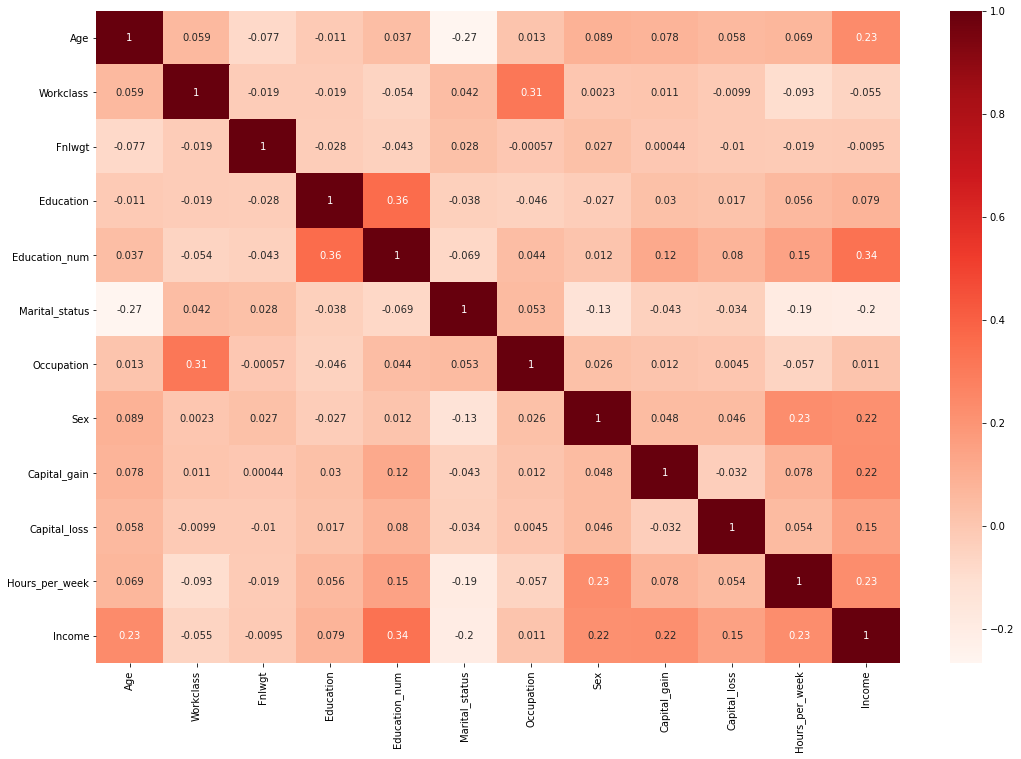

In [100]:
corr = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,cmap='Reds',annot=True)

In [101]:
x=df.drop("Income",axis=1)
y=df.Income

In [102]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

# Over Sampling

In [104]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Counter(y_train)

Counter({1: 5431, 0: 17361})

In [105]:
os=RandomOverSampler(0.80)
x_train_s,y_train_s=os.fit_resample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_s)))

The number of classes before fitCounter({0: 17361, 1: 5431})
The number of classes after fitCounter({0: 17361, 1: 13888})


# Finding The Best Random State

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
maxAucc=0
maxRS=0
for i in range(1,200):
    x_train_s,x_test_s,y_train_s,y_test_=train_test_split(x,y,test_size=0.30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.8199221949221949 on random_state 1


# Creating Train Test Split

In [107]:
x_train_s,x_test_s,y_train_s,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg_lr = LogisticRegression(random_state=56)
reg_lr.fit(x_train_s,y_train_s)
pred_lr=reg_lr.predict(x_test_s)
lr_acc=metrics.accuracy_score(y_test,pred_lr)*100
lr_acc

82.38124488124488

# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(x_train_s,y_train_s)
pred_KNN = model_KNN.predict(x_test_s)
knn_acc = model_KNN.score(x_test,y_test)*100
knn_acc


65.74529074529075

# Naive Bayes

# Gaussian NB

In [110]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(x_train_s,y_train_s)
pred_gnb = model_gnb.predict(x_test_s)
gnb_acc = metrics.accuracy_score(y_test,pred_gnb)*100
gnb_acc 

80.19041769041769

# BernoulliNB

In [111]:
from sklearn.naive_bayes import BernoulliNB
model_bnb=BernoulliNB()
model_bnb.fit(x_train_s,y_train_s)
pred_bnb = model_bnb.predict(x_test_s)
bnb_acc = metrics.accuracy_score(y_test,pred_bnb)*100
bnb_acc

80.68181818181817

# SVM

In [112]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(x_train_s,y_train_s)
pred_svc = model_svc.predict(x_test_s)
svc_acc = metrics.accuracy_score(y_test,pred_svc)*100
svc_acc

84.73587223587224

# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
model_tree.fit(x_train_s,y_train_s)
pred_tree = model_tree.predict(x_test_s)
tree_acc=metrics.accuracy_score(y_test,pred_tree)*100
tree_acc

80.85585585585585

# Entropy

In [114]:
model_tree1 = DecisionTreeClassifier(criterion="entropy") #max_leaf_nodes=12 #random_state=1
model_tree1.fit(x_train_s,y_train_s)
pred_tree1 = model_tree1.predict(x_test_s)
tree1_acc= metrics.accuracy_score(y_test,pred_tree1)*100
tree1_acc

81.78746928746928

# RandomForest

In [115]:
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(x_train_s,y_train_s)
b_pred = b.predict(x_test_s)
bacc=metrics.accuracy_score(y_test,b_pred)*100
bacc

84.83824733824734

# Entropy

In [116]:
b1 = RandomForestClassifier(criterion="entropy",max_leaf_nodes=14)
b1.fit(x_train_s,y_train_s)
b1_pred = b1.predict(x_test_s)
b1acc=metrics.accuracy_score(y_test,b1_pred)*100
b1acc

84.5004095004095

# Ensemble methods:

# BaggingClassifier

In [117]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(x_train_s,y_train_s)
bagging_pred = bagging.predict(x_test_s)
bc=metrics.accuracy_score(y_test,b_pred)*100
bc

84.83824733824734

# GradientBoostingClassifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
model_E_GBC = GradientBoostingClassifier(n_estimators=200,learning_rate=.02)
model_E_GBC.fit(x_train_s,y_train_s)
pred_E_GBC = model_E_GBC.predict(x_test_s)
gbcacc = metrics.accuracy_score(y_test,pred_E_GBC)*100
gbcacc

85.1965601965602

# VotingClassifier

In [119]:
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC()
model_E_VC = VotingClassifier(estimators=[('DT',model1),('LR',model2),('SVC',model3)])
model_E_VC.fit(x_train_s,y_train_s)
pred_E_VC = model_E_VC.predict(x_test_s)
vc=metrics.accuracy_score(y_test,pred_E_VC)*100
vc

84.26494676494677

In [120]:
accuracyScore = [lr_acc,knn_acc,gnb_acc,bnb_acc,svc_acc,tree_acc,tree1_acc,bacc,b1acc,bc,gbcacc,vc]
algoName = ['LR', 'KNN' , 'GNB', 'BNB' , 'SVM' , 'DT' , 'EDT', 'RF' , 'ERF','BC','GBC','VC']

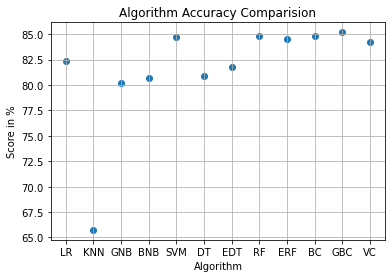

In [121]:
plt.scatter(algoName, accuracyScore)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Score in %')
plt.show()

# RESULT: From Above PLot We Clearly See That We Got Max. Accuracy From GBC Model .

# Saving The Model

In [124]:
import joblib
joblib.dump(gbcacc,"Census.pkl")

['Census.pkl']